#Question 1

##Importing Libraries

In [1]:
import pandas as pd

## Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/rawData.csv'
load_data = pd.read_csv(file_path)

Mounted at /content/drive


In [4]:
load_data.head(10)

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


##Data Preprocessing

In [5]:
#Check for missing values
load_data.isnull().sum()

,0
Height,0
Weight,0
Age,0
Grip strength,0
Frailty,0


In [6]:
#Convert 'Frailty' categorical variable to numerical
load_data['Frailty'] = load_data['Frailty'].replace({'Y': 1, 'N': 0})
load_data.head(10)

<ipython-input-6-55c9b8e51de7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  load_data['Frailty'] = load_data['Frailty'].replace({'Y': 1, 'N': 0})


,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,0
1,71.5,136,19,31,0
2,69.4,153,45,29,0
3,68.2,142,22,28,1
4,67.8,144,29,24,1
5,68.7,123,50,26,0
6,69.8,141,51,22,1
7,70.1,136,23,20,1
8,67.9,112,17,19,0
9,66.8,120,39,31,0


In [7]:
load_data.describe()

,Height,Weight,Age,Grip strength,Frailty
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,68.600000,131.900000,32.500000,26.000000,0.400000
std,1.670662,14.231811,12.860361,4.521553,0.516398
min,65.800000,112.000000,17.000000,19.000000,0.000000
25%,67.825000,120.750000,22.250000,22.500000,0.000000
50%,68.450000,136.000000,29.500000,27.000000,0.000000
75%,69.700000,141.750000,43.500000,29.750000,1.000000
max,71.500000,153.000000,51.000000,31.000000,1.000000


In [8]:
load_data.to_csv('cleandata.csv', index=False)

##Data Analysis

In [9]:
from scipy.stats import ttest_ind
# Separate Grip Strength based on Frailty status
frail_grip_strength = load_data[load_data['Frailty'] == 1]['Grip strength']
non_frail_grip_strength = load_data[load_data['Frailty'] == 0]['Grip strength']
grip_strength_ttest = ttest_ind(frail_grip_strength, non_frail_grip_strength, equal_var=False)
print("T-Test results for Grip Strength between Frail and Non-Frail Participants:")

print("T-Statistic:", grip_strength_ttest.statistic)
print("P-Value:", grip_strength_ttest.pvalue)

T-Test results for Grip Strength between Frail and Non-Frail Participants:
T-Statistic: -1.6349999934600006
P-Value: 0.1415730416628566


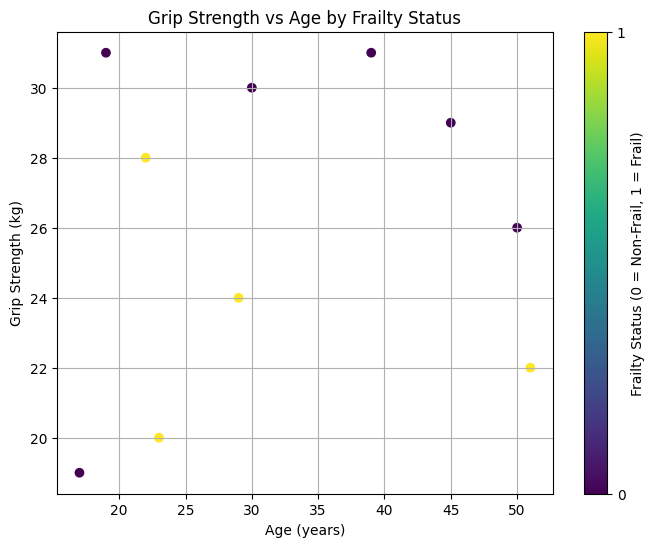

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter Plot of Grip Strength vs Age by Frailty
plt.figure(figsize=(8, 6))
plt.scatter(load_data['Age'], load_data['Grip strength'], c=load_data['Frailty'])
plt.colorbar(ticks=[0, 1], label='Frailty Status (0 = Non-Frail, 1 = Frail)')
plt.xlabel('Age (years)')
plt.ylabel('Grip Strength (kg)')
plt.title('Grip Strength vs Age by Frailty Status')
plt.grid(True)
plt.show()

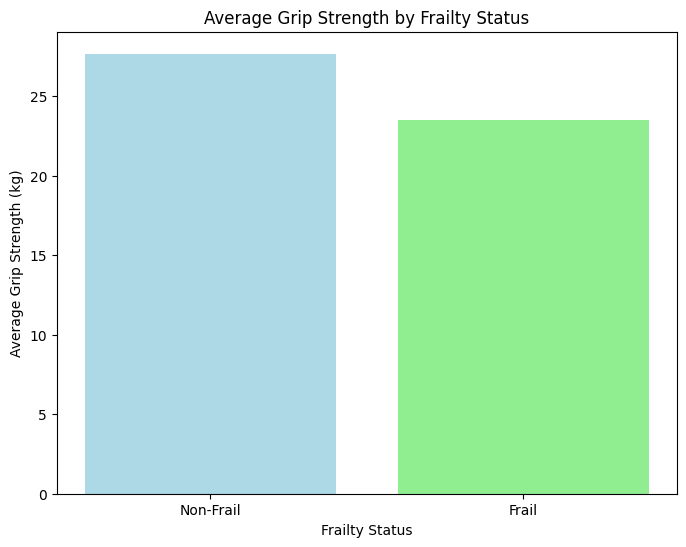

In [11]:
# Visualization - Bar Plot of Average Grip Strength by Frailty
avg = load_data.groupby('Frailty')['Grip strength'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(avg['Frailty'], avg['Grip strength'], color=['lightblue', 'lightgreen'])
plt.xlabel('Frailty Status')
plt.ylabel('Average Grip Strength (kg)')
plt.title('Average Grip Strength by Frailty Status')
plt.xticks(ticks=[0, 1], labels=['Non-Frail', 'Frail'])
plt.show()


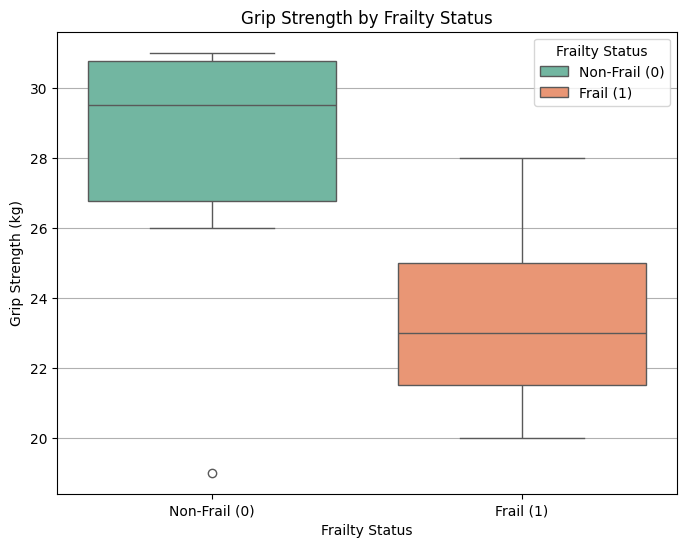

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot of Grip Strength by Frailty
plt.figure(figsize=(8, 6))
sns.boxplot(x='Frailty', y='Grip strength', data=load_data, hue='Frailty', palette="Set2", dodge=False)
plt.xlabel('Frailty Status')
plt.ylabel('Grip Strength (kg)')
plt.title('Grip Strength by Frailty Status')
plt.xticks(ticks=[0, 1], labels=['Non-Frail (0)', 'Frail (1)'])
plt.legend(title='Frailty Status', loc='upper right', labels=['Non-Frail (0)', 'Frail (1)'])
plt.grid(axis='y')  # Optional: Add grid lines for better readability
plt.show()

#Question 2

##Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/StudentsPerformance.csv'
load_data = pd.read_csv(file_path)
load_data.head(10)

Mounted at /content/drive


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


##Data Preprocessing

In [4]:
#Check for missing values
print(load_data.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


##Data Visualization

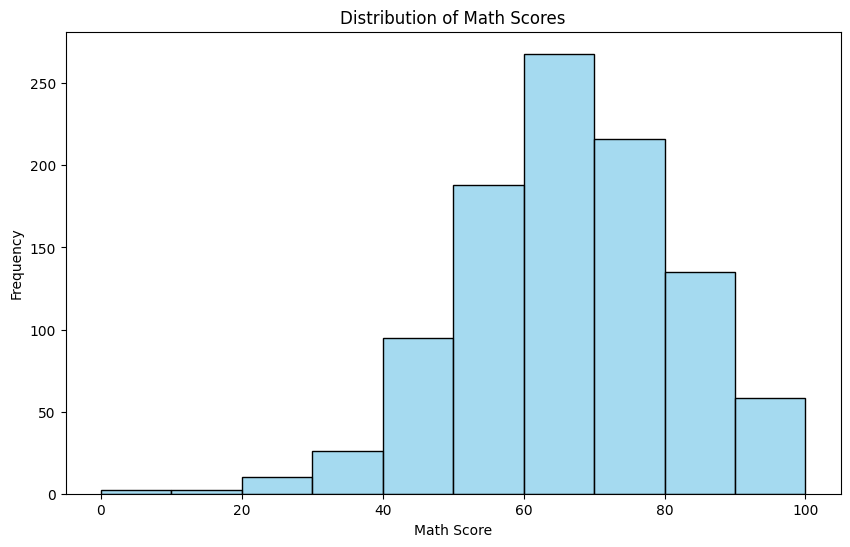

In [8]:
# Visualization 1: Distribution of Math Scores (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(load_data['math score'], bins=10,  color='skyblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.savefig('/content/drive/My Drive/visualizations_pds_assignment-1/v_1.png')  # Save the figure
plt.show()

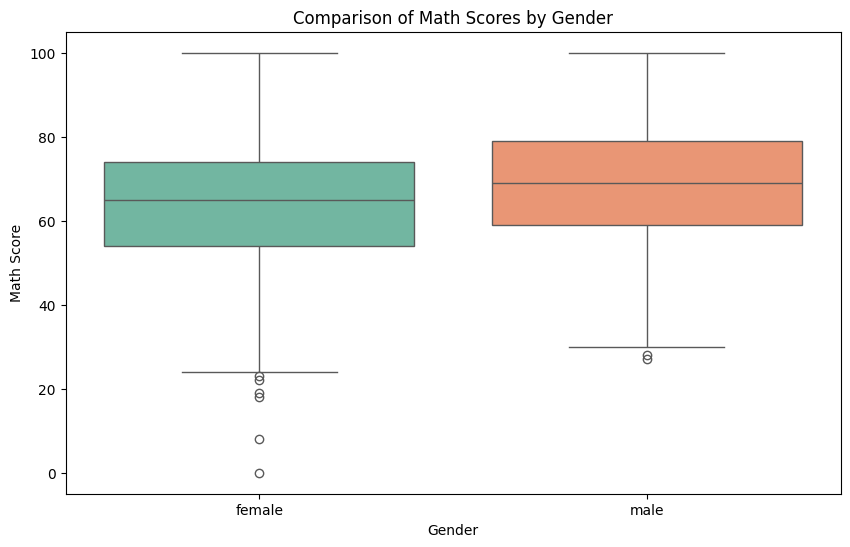

In [13]:
# Visualization 2: Box Plot of Math Scores by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math score', data=load_data, hue='gender', palette='Set2', legend=False)
plt.title('Comparison of Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.savefig('/content/drive/My Drive/visualizations_pds_assignment-1/v_2.png')  # Save the figure
plt.show()

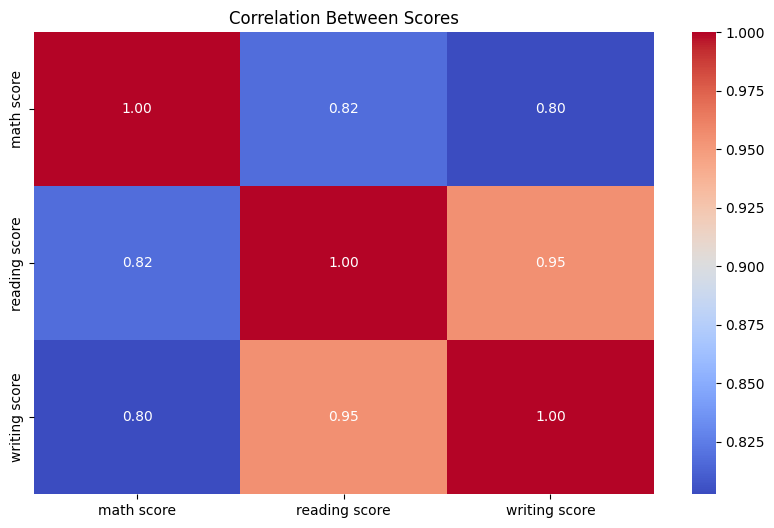

In [15]:
#Visualizaton3
plt.figure(figsize=(10, 6))
correlation = load_data[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Scores')
plt.savefig('/content/drive/My Drive/visualizations_pds_assignment-1/v_3.png')  # Save the figure
plt.show()

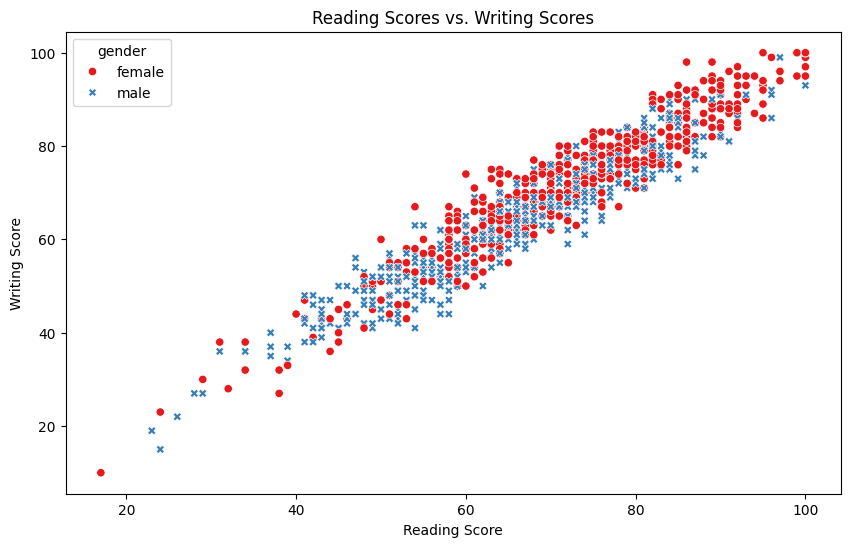

In [17]:
# Visualization 4: Scatter Plot of Reading Scores vs. Writing Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reading score', y='writing score', data=load_data, hue='gender', style='gender', palette='Set1')
plt.title('Reading Scores vs. Writing Scores')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.savefig('/content/drive/My Drive/visualizations_pds_assignment-1/v_4.png')  # Save the figure
plt.show()

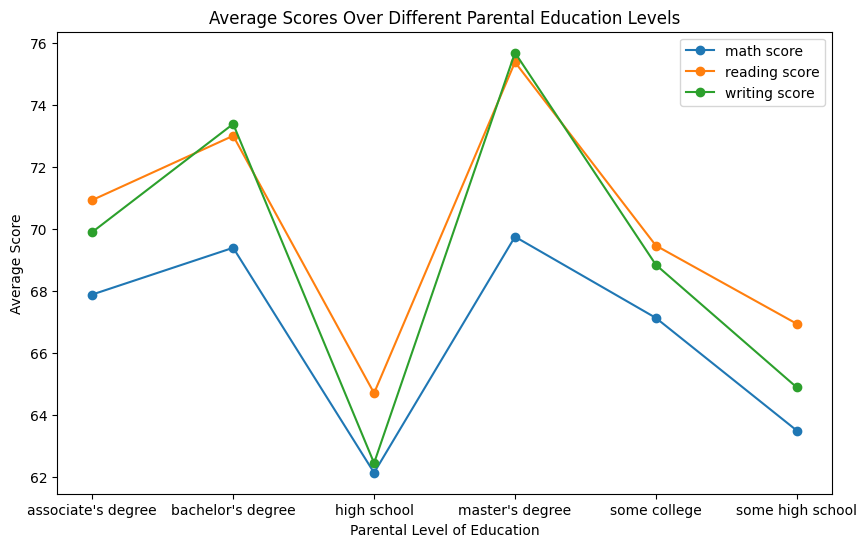

In [19]:
# Visualization 5: Line Plot of Average Scores Over Different Education Levels
avg_scores = load_data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().reset_index()
avg_scores.set_index('parental level of education', inplace=True)
avg_scores.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Scores Over Different Parental Education Levels')
plt.ylabel('Average Score')
plt.xlabel('Parental Level of Education')
plt.savefig('/content/drive/My Drive/visualizations_pds_assignment-1/v_5.png')  # Save the figure
plt.show()